In [1]:
import pandas as pd
te = pd.read_excel('./Dataset/ts.xlsx')
tr = pd.read_excel('./temp/4_data_reduction.xlsx')

In [2]:
feat_final = tr.columns

In [3]:
te.drop(columns=['BlankCount', 'ID', 'OP_time_minute'], inplace=True)


In [4]:
def draw_hist(df):
    fig = df.hist(figsize=(60, 60),
        xlabelsize=30, 
        ylabelsize=30)

    [x.title.set_size(32) for x in fig.ravel()]

    [x.xaxis.get_major_locator().set_params(integer=True) for x in fig.ravel()]

def draw_boxplot(df):
    fig = df.boxplot(figsize=(30, 60),
                    fontsize=35,
                    rot=45,
                    vert=False)
    


## remove outlier

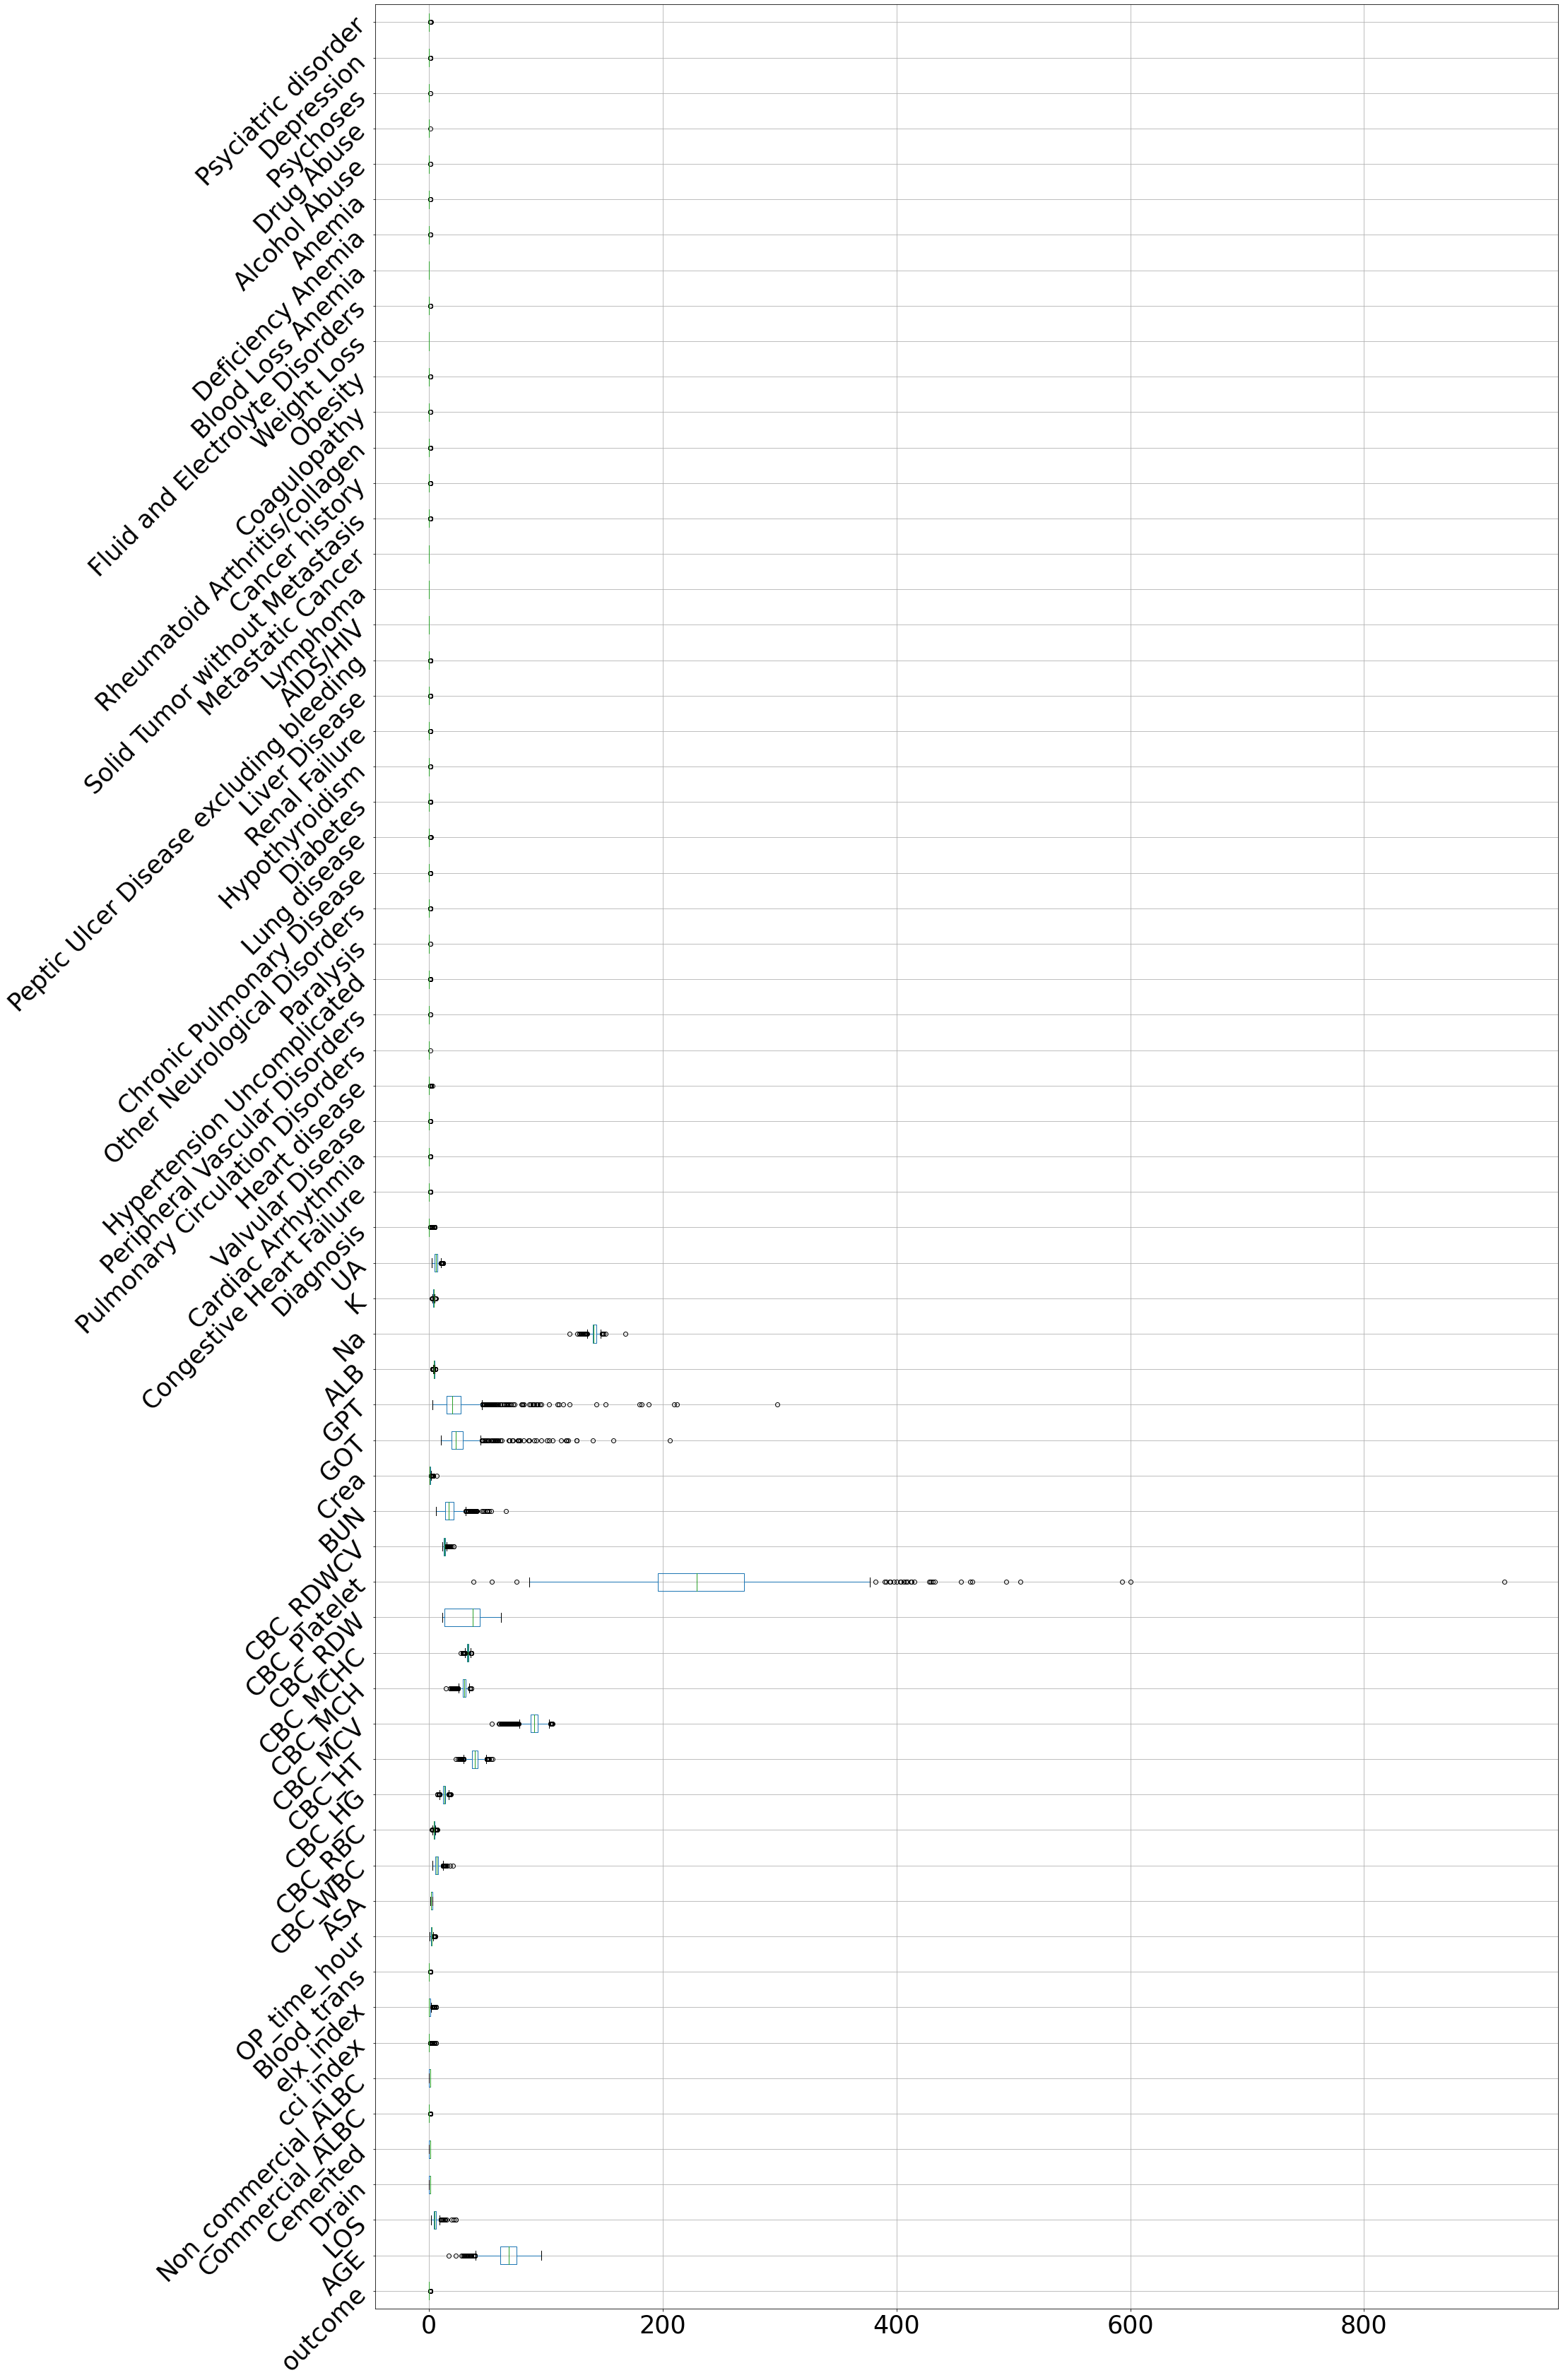

In [5]:
draw_boxplot(te)
te.CBC_Platelet.describe()
idma = te.CBC_Platelet.idxmax()
te.drop(idma, inplace=True)
#the reason why I didnot remove CBC_Platelet=600 is because there is still 
# probably to show this value in clinical test

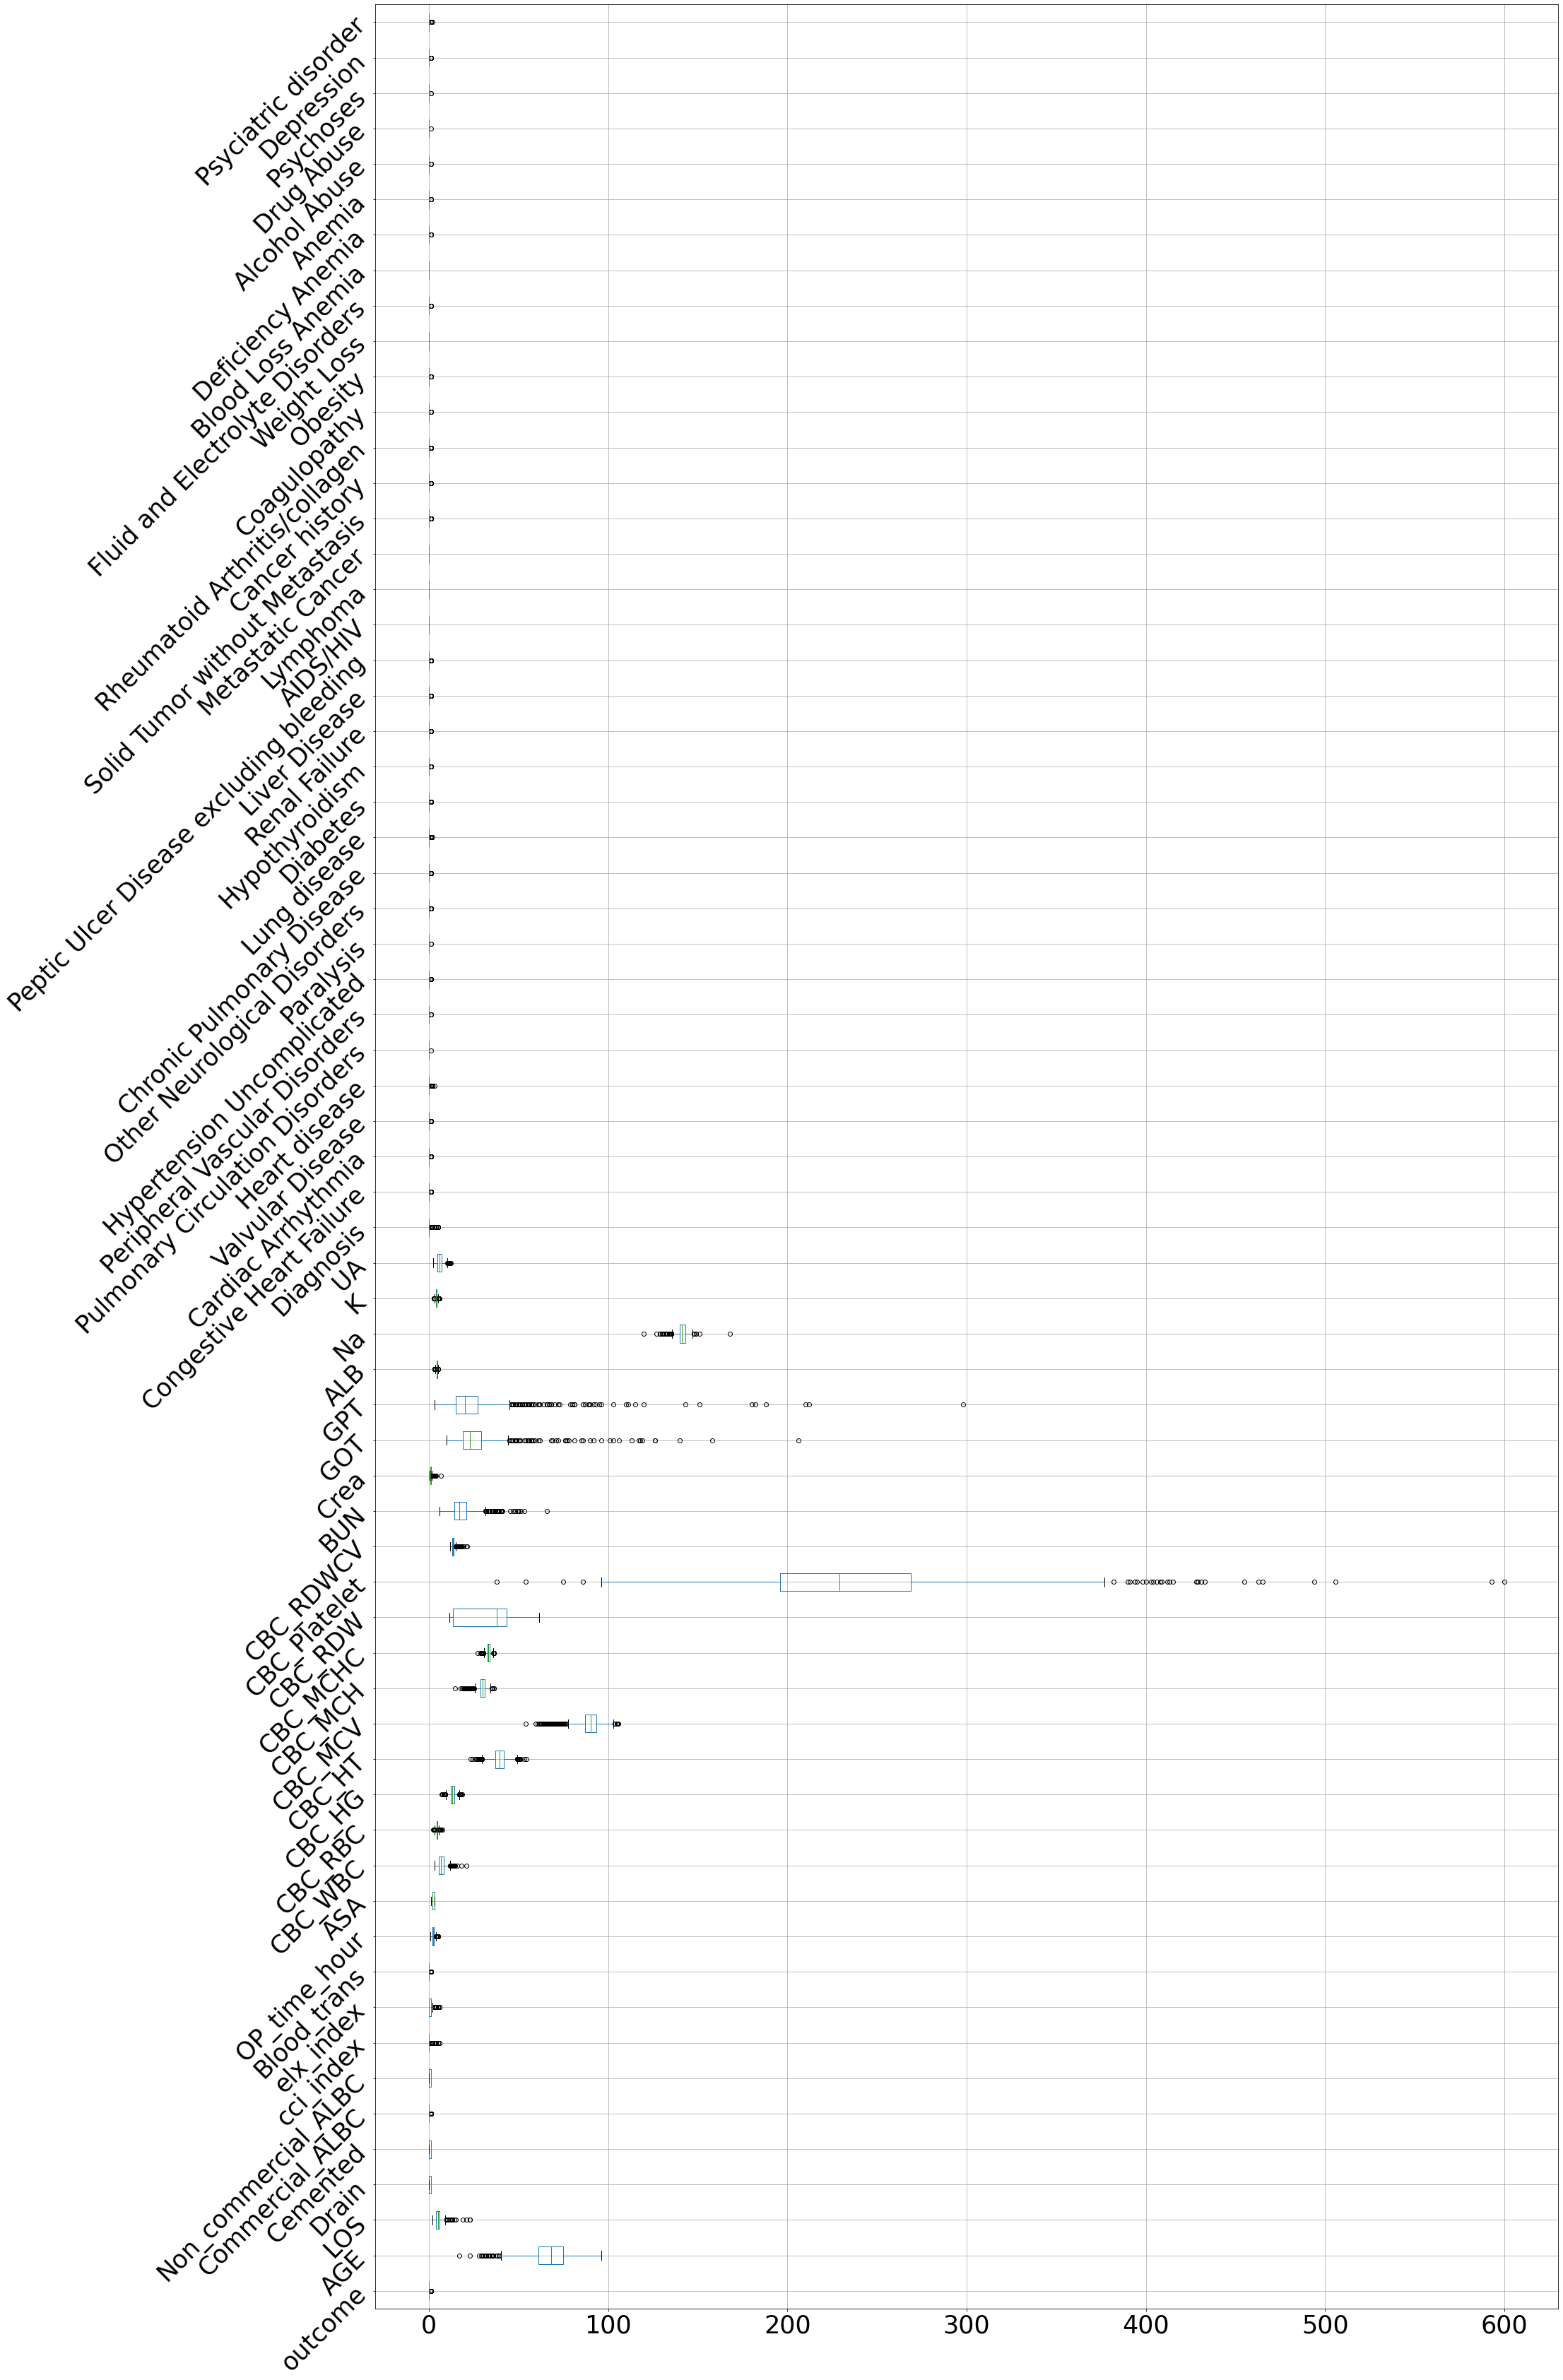

In [6]:
draw_boxplot(te)

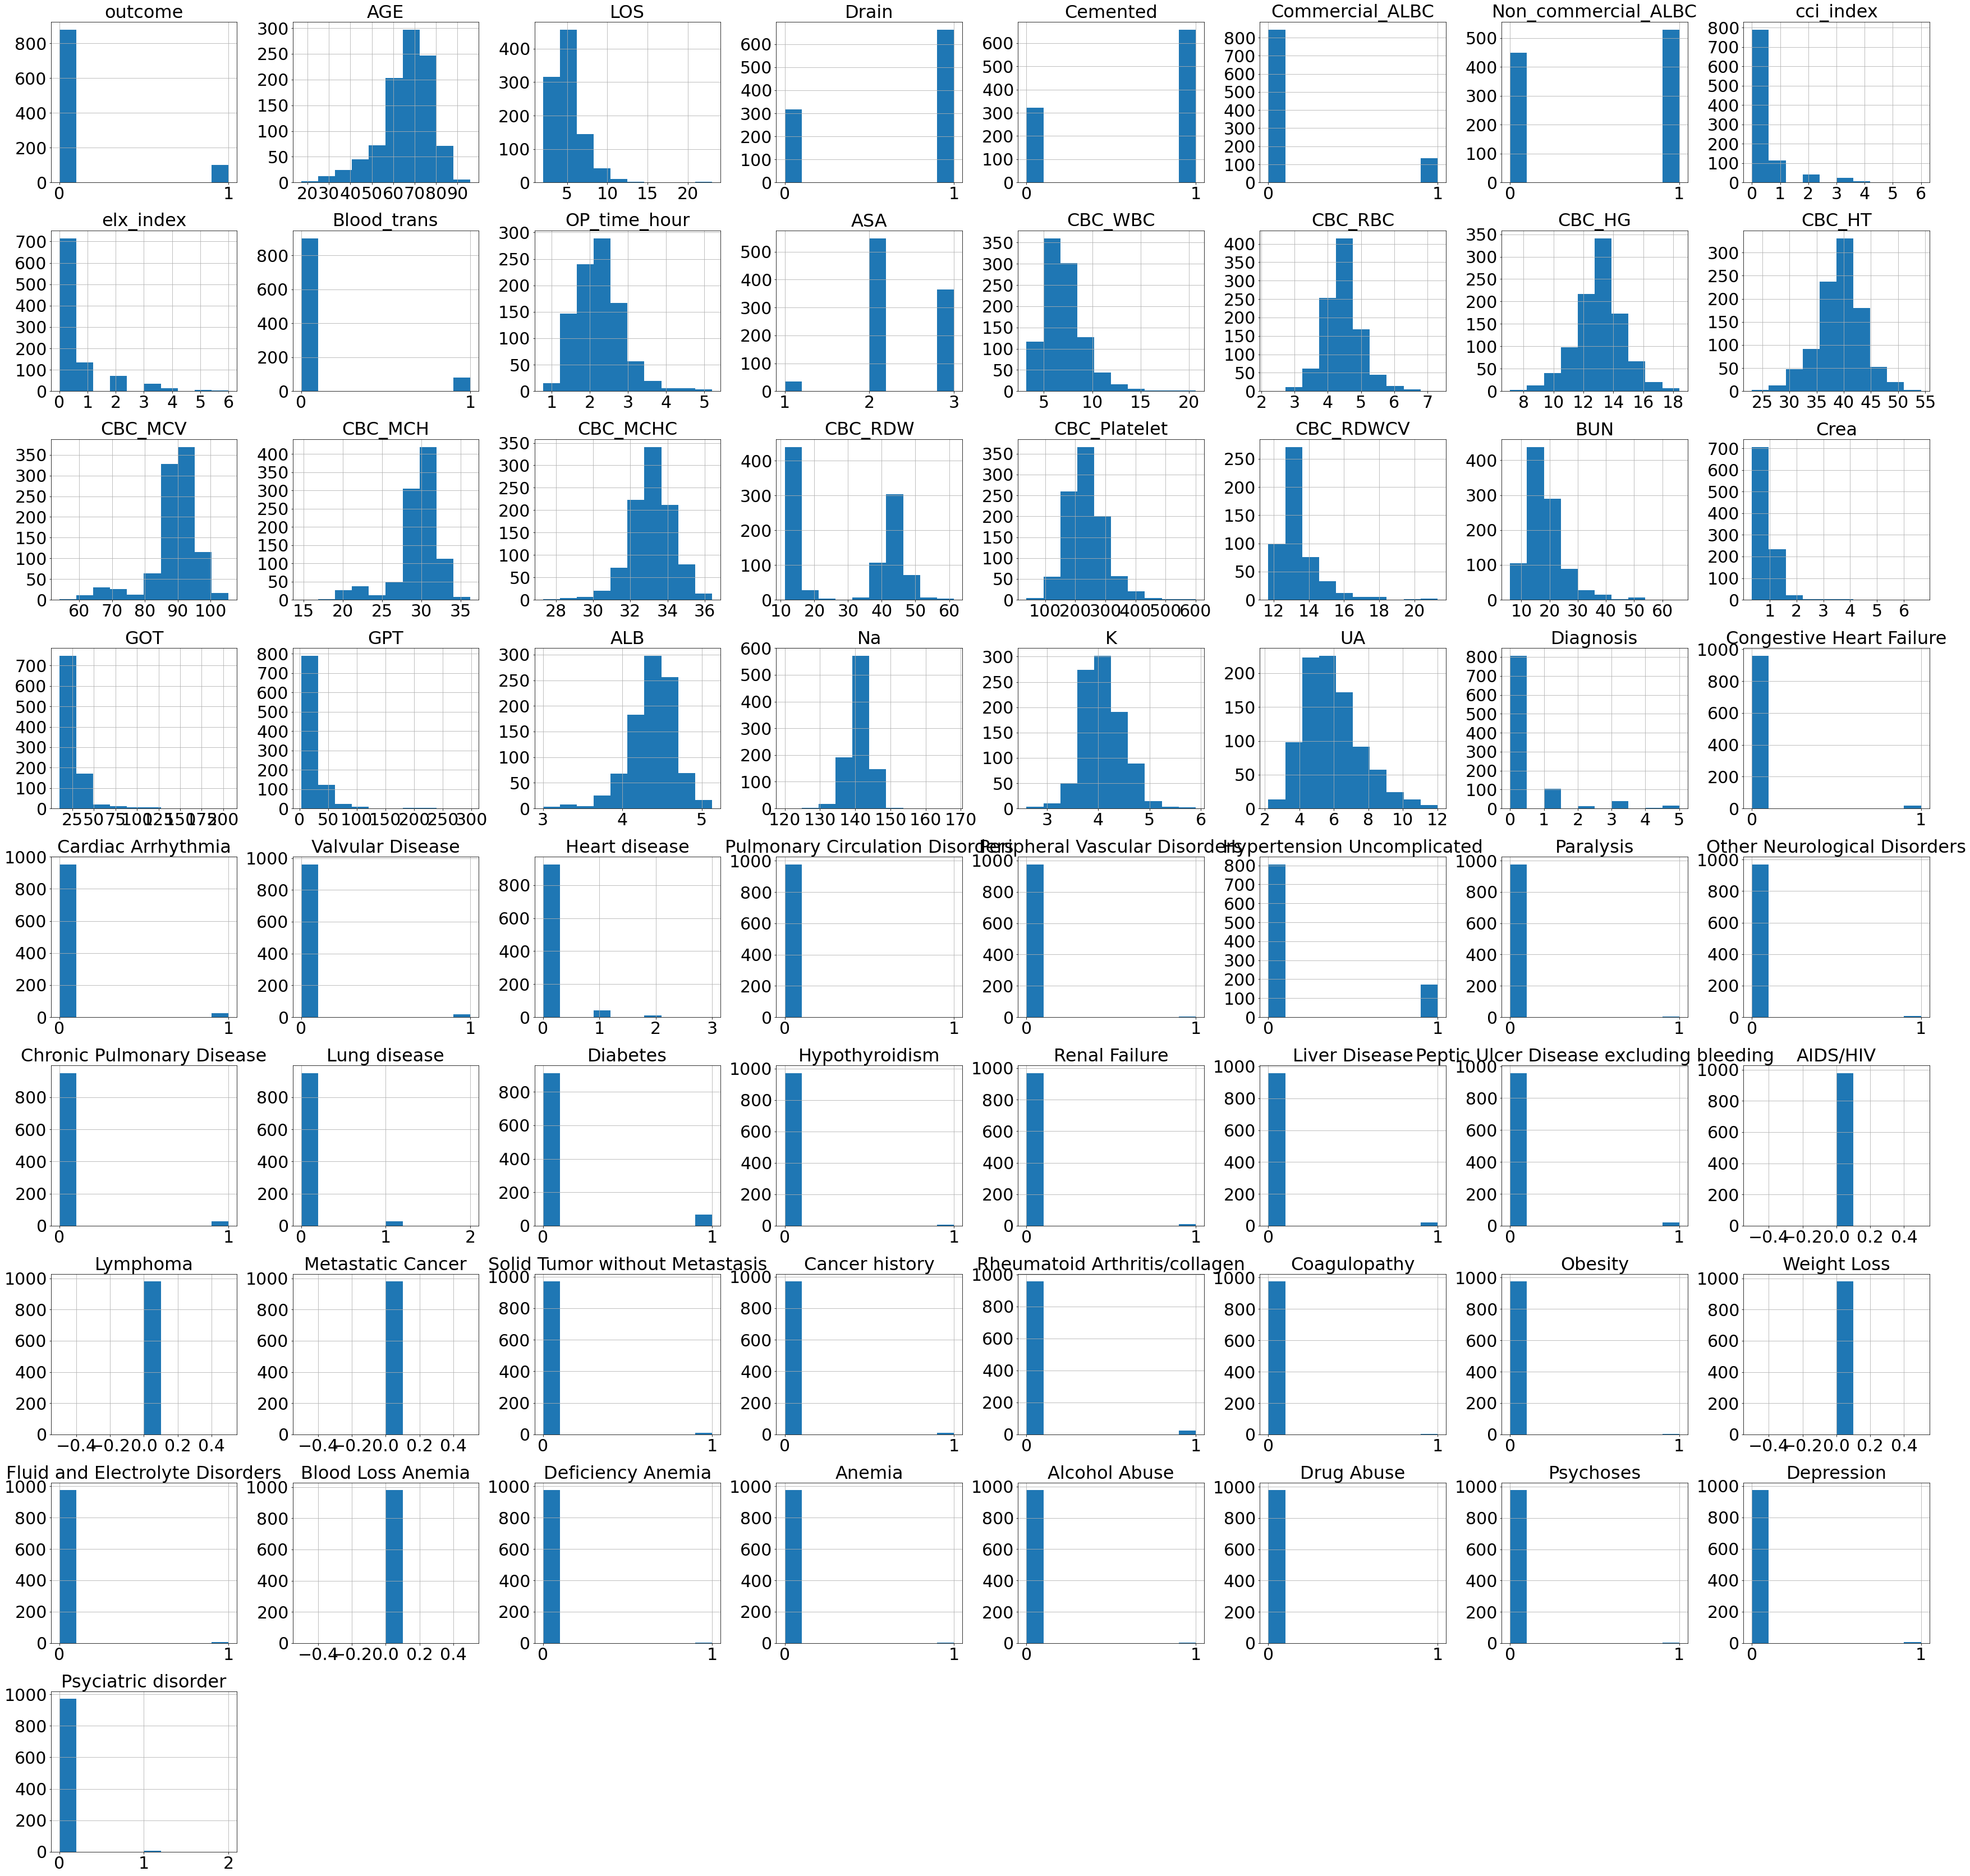

In [7]:
draw_hist(te)

In [8]:
te.shape

(979, 67)

In [9]:
te.dtypes.value_counts()

int64      45
float64    20
object      2
dtype: int64

## data imputation and transform

In [10]:
pd.set_option('display.max_rows', None)
te.isnull().sum()

outcome                                      0
AGE                                          0
SEX                                          0
LOS                                          0
Joint                                        0
Drain                                        0
Cemented                                     0
Commercial_ALBC                              0
Non_commercial_ALBC                          0
cci_index                                    0
elx_index                                    0
Blood_trans                                  0
OP_time_hour                                30
ASA                                         33
CBC_WBC                                      6
CBC_RBC                                      6
CBC_HG                                       1
CBC_HT                                       1
CBC_MCV                                      7
CBC_MCH                                      7
CBC_MCHC                                     7
CBC_RDW      

#### nomial (object)

In [13]:
te.columns

Index(['outcome', 'AGE', 'SEX', 'LOS', 'Joint', 'Drain', 'Cemented',
       'Commercial_ALBC', 'Non_commercial_ALBC', 'cci_index', 'elx_index',
       'Blood_trans', 'OP_time_hour', 'ASA', 'CBC_WBC', 'CBC_RBC', 'CBC_HG',
       'CBC_HT', 'CBC_MCV', 'CBC_MCH', 'CBC_MCHC', 'CBC_RDW', 'CBC_Platelet',
       'CBC_RDWCV', 'BUN', 'Crea', 'GOT', 'GPT', 'ALB', 'Na', 'K', 'UA',
       'Diagnosis', 'Congestive Heart Failure', 'Cardiac Arrhythmia',
       'Valvular Disease', 'Heart disease', 'Pulmonary Circulation Disorders',
       'Peripheral Vascular Disorders', 'Hypertension Uncomplicated',
       'Paralysis', 'Other Neurological Disorders',
       'Chronic Pulmonary Disease', 'Lung disease', 'Diabetes',
       'Hypothyroidism', 'Renal Failure', 'Liver Disease',
       'Peptic Ulcer Disease excluding bleeding', 'AIDS/HIV', 'Lymphoma',
       'Metastatic Cancer', 'Solid Tumor without Metastasis', 'Cancer history',
       'Rheumatoid Arthritis/collagen', 'Coagulopathy', 'Obesity',
       'Weigh

In [18]:

te = pd.get_dummies(te)
te.dtypes
te.select_dtypes('uint8').columns

Index(['SEX_F', 'SEX_M', 'Joint_THA', 'Joint_TKA'], dtype='object')

#### ordinal on elx_index and cci_index(discreterize)
other ordinal considered as continous after minmax 

In [19]:
te.columns

Index(['outcome', 'AGE', 'LOS', 'Drain', 'Cemented', 'Commercial_ALBC',
       'Non_commercial_ALBC', 'cci_index', 'elx_index', 'Blood_trans',
       'OP_time_hour', 'ASA', 'CBC_WBC', 'CBC_RBC', 'CBC_HG', 'CBC_HT',
       'CBC_MCV', 'CBC_MCH', 'CBC_MCHC', 'CBC_RDW', 'CBC_Platelet',
       'CBC_RDWCV', 'BUN', 'Crea', 'GOT', 'GPT', 'ALB', 'Na', 'K', 'UA',
       'Diagnosis', 'Congestive Heart Failure', 'Cardiac Arrhythmia',
       'Valvular Disease', 'Heart disease', 'Pulmonary Circulation Disorders',
       'Peripheral Vascular Disorders', 'Hypertension Uncomplicated',
       'Paralysis', 'Other Neurological Disorders',
       'Chronic Pulmonary Disease', 'Lung disease', 'Diabetes',
       'Hypothyroidism', 'Renal Failure', 'Liver Disease',
       'Peptic Ulcer Disease excluding bleeding', 'AIDS/HIV', 'Lymphoma',
       'Metastatic Cancer', 'Solid Tumor without Metastasis', 'Cancer history',
       'Rheumatoid Arthritis/collagen', 'Coagulopathy', 'Obesity',
       'Weight Loss', 'Fluid 

In [20]:
#onehot for column_need_onehot
column_need_onehot = ['Diagnosis', 'Heart disease', 'Lung disease', 'Cancer history', 'Anemia', 'Psyciatric disorder']
confuse = ['cci_index', 'elx_index']
te[column_need_onehot] = te[column_need_onehot].astype('object')
te = pd.get_dummies(te)
te.columns


Index(['outcome', 'AGE', 'LOS', 'Drain', 'Cemented', 'Commercial_ALBC',
       'Non_commercial_ALBC', 'cci_index', 'elx_index', 'Blood_trans',
       'OP_time_hour', 'ASA', 'CBC_WBC', 'CBC_RBC', 'CBC_HG', 'CBC_HT',
       'CBC_MCV', 'CBC_MCH', 'CBC_MCHC', 'CBC_RDW', 'CBC_Platelet',
       'CBC_RDWCV', 'BUN', 'Crea', 'GOT', 'GPT', 'ALB', 'Na', 'K', 'UA',
       'Congestive Heart Failure', 'Cardiac Arrhythmia', 'Valvular Disease',
       'Pulmonary Circulation Disorders', 'Peripheral Vascular Disorders',
       'Hypertension Uncomplicated', 'Paralysis',
       'Other Neurological Disorders', 'Chronic Pulmonary Disease', 'Diabetes',
       'Hypothyroidism', 'Renal Failure', 'Liver Disease',
       'Peptic Ulcer Disease excluding bleeding', 'AIDS/HIV', 'Lymphoma',
       'Metastatic Cancer', 'Solid Tumor without Metastasis',
       'Rheumatoid Arthritis/collagen', 'Coagulopathy', 'Obesity',
       'Weight Loss', 'Fluid and Electrolyte Disorders', 'Blood Loss Anemia',
       'Deficiency Ane

In [21]:
#discreterize for elx_index, since there are too many class in this attr
els_bin = [-1, 2, 4, 6, 8, 10, 13]
new_elx = pd.get_dummies(pd.cut(te['elx_index'], bins=els_bin))#5 class
new_elx.columns = ['elx1', 'elx2', 'elx3', 'elx4', 'elx5', 'elx6']
te = pd.concat((te, new_elx), axis=1)
te.drop(columns='elx_index', inplace=True)

In [22]:
#discreterize for cci_index, since there are too many class in this attr
new_cci = pd.get_dummies(pd.cut(te['cci_index'], bins=[-1, 0, 4, 7, 12, 15]))#5 class
new_cci.columns = ['cci1', 'cci2', 'cci3', 'cci4', 'cci5']
te = pd.concat((te, new_cci), axis=1)
te.drop(columns='cci_index', inplace=True)

In [23]:
te.select_dtypes('uint8').columns

Index(['SEX_F', 'SEX_M', 'Joint_THA', 'Joint_TKA', 'Diagnosis_0',
       'Diagnosis_1', 'Diagnosis_2', 'Diagnosis_3', 'Diagnosis_4',
       'Diagnosis_5', 'Heart disease_0', 'Heart disease_1', 'Heart disease_2',
       'Heart disease_3', 'Lung disease_0', 'Lung disease_1', 'Lung disease_2',
       'Cancer history_0', 'Cancer history_1', 'Anemia_0', 'Anemia_1',
       'Psyciatric disorder_0', 'Psyciatric disorder_1',
       'Psyciatric disorder_2', 'elx1', 'elx2', 'elx3', 'elx4', 'elx5', 'elx6',
       'cci1', 'cci2', 'cci3', 'cci4', 'cci5'],
      dtype='object')

In [24]:
te.dtypes.value_counts()

int64      37
uint8      35
float64    20
dtype: int64

In [25]:
col = te.select_dtypes('uint8').columns
print(col)
te[col] = te[col].astype('int64')
# col = te.select_dtypes('int').columns
# te[col] = te[col].astype('object')

Index(['SEX_F', 'SEX_M', 'Joint_THA', 'Joint_TKA', 'Diagnosis_0',
       'Diagnosis_1', 'Diagnosis_2', 'Diagnosis_3', 'Diagnosis_4',
       'Diagnosis_5', 'Heart disease_0', 'Heart disease_1', 'Heart disease_2',
       'Heart disease_3', 'Lung disease_0', 'Lung disease_1', 'Lung disease_2',
       'Cancer history_0', 'Cancer history_1', 'Anemia_0', 'Anemia_1',
       'Psyciatric disorder_0', 'Psyciatric disorder_1',
       'Psyciatric disorder_2', 'elx1', 'elx2', 'elx3', 'elx4', 'elx5', 'elx6',
       'cci1', 'cci2', 'cci3', 'cci4', 'cci5'],
      dtype='object')


In [26]:
te.dtypes.value_counts()

int64      72
float64    20
dtype: int64

In [27]:
int_col = te.select_dtypes('int64').columns
print(int_col)
float_col = te.select_dtypes('float').columns
print(float_col)

Index(['outcome', 'AGE', 'LOS', 'Drain', 'Cemented', 'Commercial_ALBC',
       'Non_commercial_ALBC', 'Blood_trans', 'Congestive Heart Failure',
       'Cardiac Arrhythmia', 'Valvular Disease',
       'Pulmonary Circulation Disorders', 'Peripheral Vascular Disorders',
       'Hypertension Uncomplicated', 'Paralysis',
       'Other Neurological Disorders', 'Chronic Pulmonary Disease', 'Diabetes',
       'Hypothyroidism', 'Renal Failure', 'Liver Disease',
       'Peptic Ulcer Disease excluding bleeding', 'AIDS/HIV', 'Lymphoma',
       'Metastatic Cancer', 'Solid Tumor without Metastasis',
       'Rheumatoid Arthritis/collagen', 'Coagulopathy', 'Obesity',
       'Weight Loss', 'Fluid and Electrolyte Disorders', 'Blood Loss Anemia',
       'Deficiency Anemia', 'Alcohol Abuse', 'Drug Abuse', 'Psychoses',
       'Depression', 'SEX_F', 'SEX_M', 'Joint_THA', 'Joint_TKA', 'Diagnosis_0',
       'Diagnosis_1', 'Diagnosis_2', 'Diagnosis_3', 'Diagnosis_4',
       'Diagnosis_5', 'Heart disease_0', '

#### numeric attr

In [28]:
# fortunately, misasing values are all in the float columns: KNN imputation
float_missing_col = ['OP_time_minute', 'OP_time_hour', 'ASA', 'CBC_WBC', 'CBC_RBC', 
                     'CBC_HG', 'CBC_HT', 'CBC_MCV', 'CBC_MCH', 'CBC_MCHC', 'CBC_RDW', 
                     'CBC_Platelet', 'CBC_RDWCV','BUN', 'Crea', 'GOT', 'GPT', 'ALB',
                     'Na', 'K', 'UA']
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import minmax_scale

new_te = minmax_scale(te)

#deal with commensurate in float attr(including ordinal attr)
col = te.columns
te = pd.DataFrame(new_te, columns=col)


In [29]:
te.describe().transpose()
#there are some columns all zero

,count,mean,std,min,25%,50%,75%,max
outcome,979.0,0.102145,0.302994,0.0,0.000000,0.000000,0.000000,1.0
AGE,979.0,0.626097,0.148832,0.0,0.556962,0.645570,0.734177,1.0
LOS,979.0,0.163335,0.099640,0.0,0.095238,0.142857,0.190476,1.0
Drain,979.0,0.677222,0.467778,0.0,0.000000,1.000000,1.000000,1.0
Cemented,979.0,0.672114,0.469683,0.0,0.000000,1.000000,1.000000,1.0
Commercial_ALBC,979.0,0.137896,0.344967,0.0,0.000000,0.000000,0.000000,1.0
Non_commercial_ALBC,979.0,0.540347,0.498624,0.0,0.000000,1.000000,1.000000,1.0
Blood_trans,979.0,0.080695,0.272505,0.0,0.000000,0.000000,0.000000,1.0
OP_time_hour,949.0,0.331604,0.136776,0.0,0.233083,0.319549,0.413534,1.0
ASA,946.0,0.674419,0.273563,0.0,0.500000,0.500000,1.000000,1.0


In [30]:
zero_column = ['AIDS/HIV', 'Lymphoma', 'Metastatic Cancer', 'Weight Loss', 
   'Blood Loss Anemia', 'elx4', 'elx5', 'elx6', 'cci4', 'cci5']

#### continous attr

In [31]:
imputer = KNNImputer(n_neighbors=15)
new_te = imputer.fit_transform(te)

In [32]:
int_col

Index(['outcome', 'AGE', 'LOS', 'Drain', 'Cemented', 'Commercial_ALBC',
       'Non_commercial_ALBC', 'Blood_trans', 'Congestive Heart Failure',
       'Cardiac Arrhythmia', 'Valvular Disease',
       'Pulmonary Circulation Disorders', 'Peripheral Vascular Disorders',
       'Hypertension Uncomplicated', 'Paralysis',
       'Other Neurological Disorders', 'Chronic Pulmonary Disease', 'Diabetes',
       'Hypothyroidism', 'Renal Failure', 'Liver Disease',
       'Peptic Ulcer Disease excluding bleeding', 'AIDS/HIV', 'Lymphoma',
       'Metastatic Cancer', 'Solid Tumor without Metastasis',
       'Rheumatoid Arthritis/collagen', 'Coagulopathy', 'Obesity',
       'Weight Loss', 'Fluid and Electrolyte Disorders', 'Blood Loss Anemia',
       'Deficiency Anemia', 'Alcohol Abuse', 'Drug Abuse', 'Psychoses',
       'Depression', 'SEX_F', 'SEX_M', 'Joint_THA', 'Joint_TKA', 'Diagnosis_0',
       'Diagnosis_1', 'Diagnosis_2', 'Diagnosis_3', 'Diagnosis_4',
       'Diagnosis_5', 'Heart disease_0', '

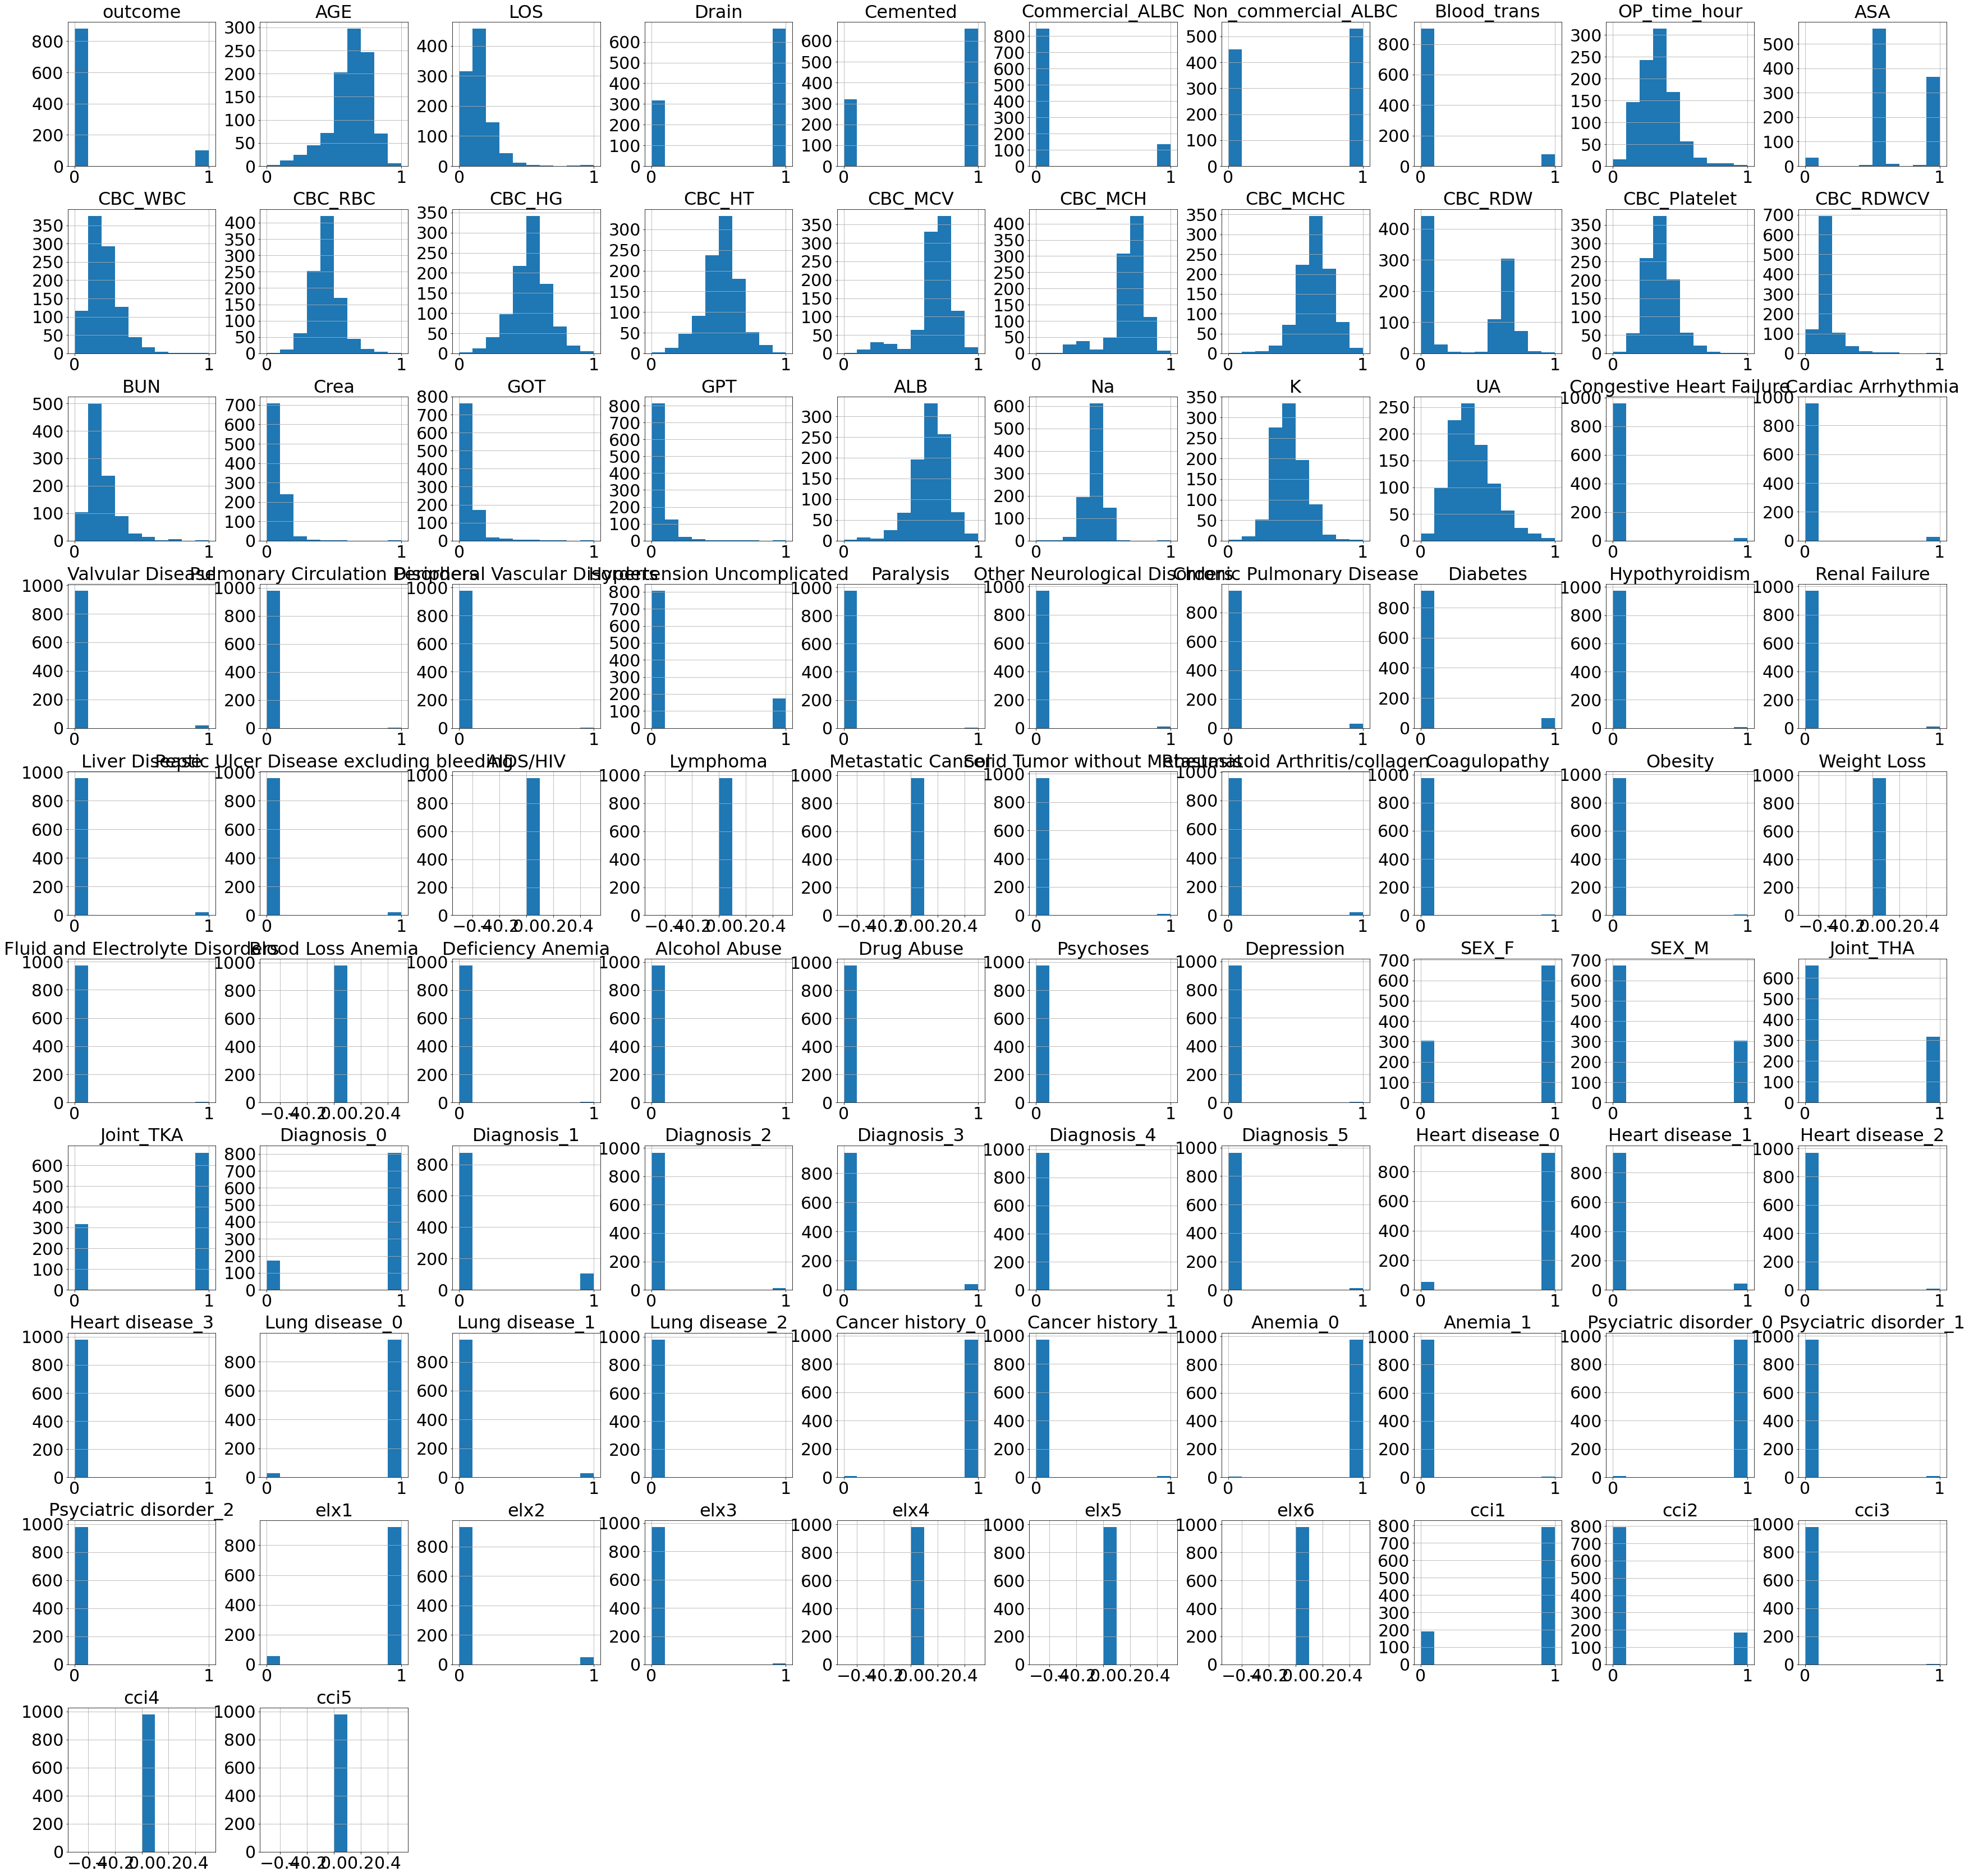

In [33]:
te[te.columns] = new_te
draw_hist(te)
# te[int_col] = te[int_col.astype('int64')

In [34]:
te.isnull().sum().sum()

0

## feature selection

In [35]:
feat_final

Index(['Diagnosis_5', 'Coagulopathy', 'Alcohol Abuse', 'Hypothyroidism',
       'Anemia_0', 'Other Neurological Disorders', 'Renal Failure', 'elx3',
       'Psyciatric disorder_0', 'Congestive Heart Failure',
       'Fluid and Electrolyte Disorders', 'Diagnosis_3', 'Valvular Disease',
       'Rheumatoid Arthritis/collagen', 'Diagnosis_2',
       'Solid Tumor without Metastasis', 'Liver Disease', 'Heart disease_0',
       'Lung disease_0', 'elx1', 'Diabetes',
       'Peptic Ulcer Disease excluding bleeding', 'Commercial_ALBC', 'Drain',
       'Hypertension Uncomplicated', 'Blood_trans', 'SEX_F',
       'Non_commercial_ALBC', 'Diagnosis_0', 'cci1', 'ASA', 'LOS', 'AGE',
       'GPT', 'CBC_HG', 'UA', 'CBC_Platelet', 'CBC_MCV', 'BUN', 'CBC_RBC',
       'Na', 'CBC_MCHC', 'GOT', 'CBC_WBC', 'OP_time_hour', 'CBC_RDWCV', 'K',
       'ALB', 'Crea', 'CBC_RDW', 'outcome'],
      dtype='object')

In [36]:
te = te[feat_final]


In [40]:
te.transpose()

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
Diagnosis_5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Coagulopathy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Alcohol Abuse,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Hypothyroidism,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Anemia_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Other Neurological Disorders,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
Renal Failure,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
elx3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Psyciatric disorder_0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Congestive Heart Failure,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
list(set(feat_final)&set(zero_column))
# there is no intersection between zero columns and feat final columns

[]

In [42]:
onehot_col = te.iloc[0:30, 0:30].columns
onehot_col = onehot_col.insert(31, 'outcome')
te[onehot_col] = te[onehot_col].astype("int")

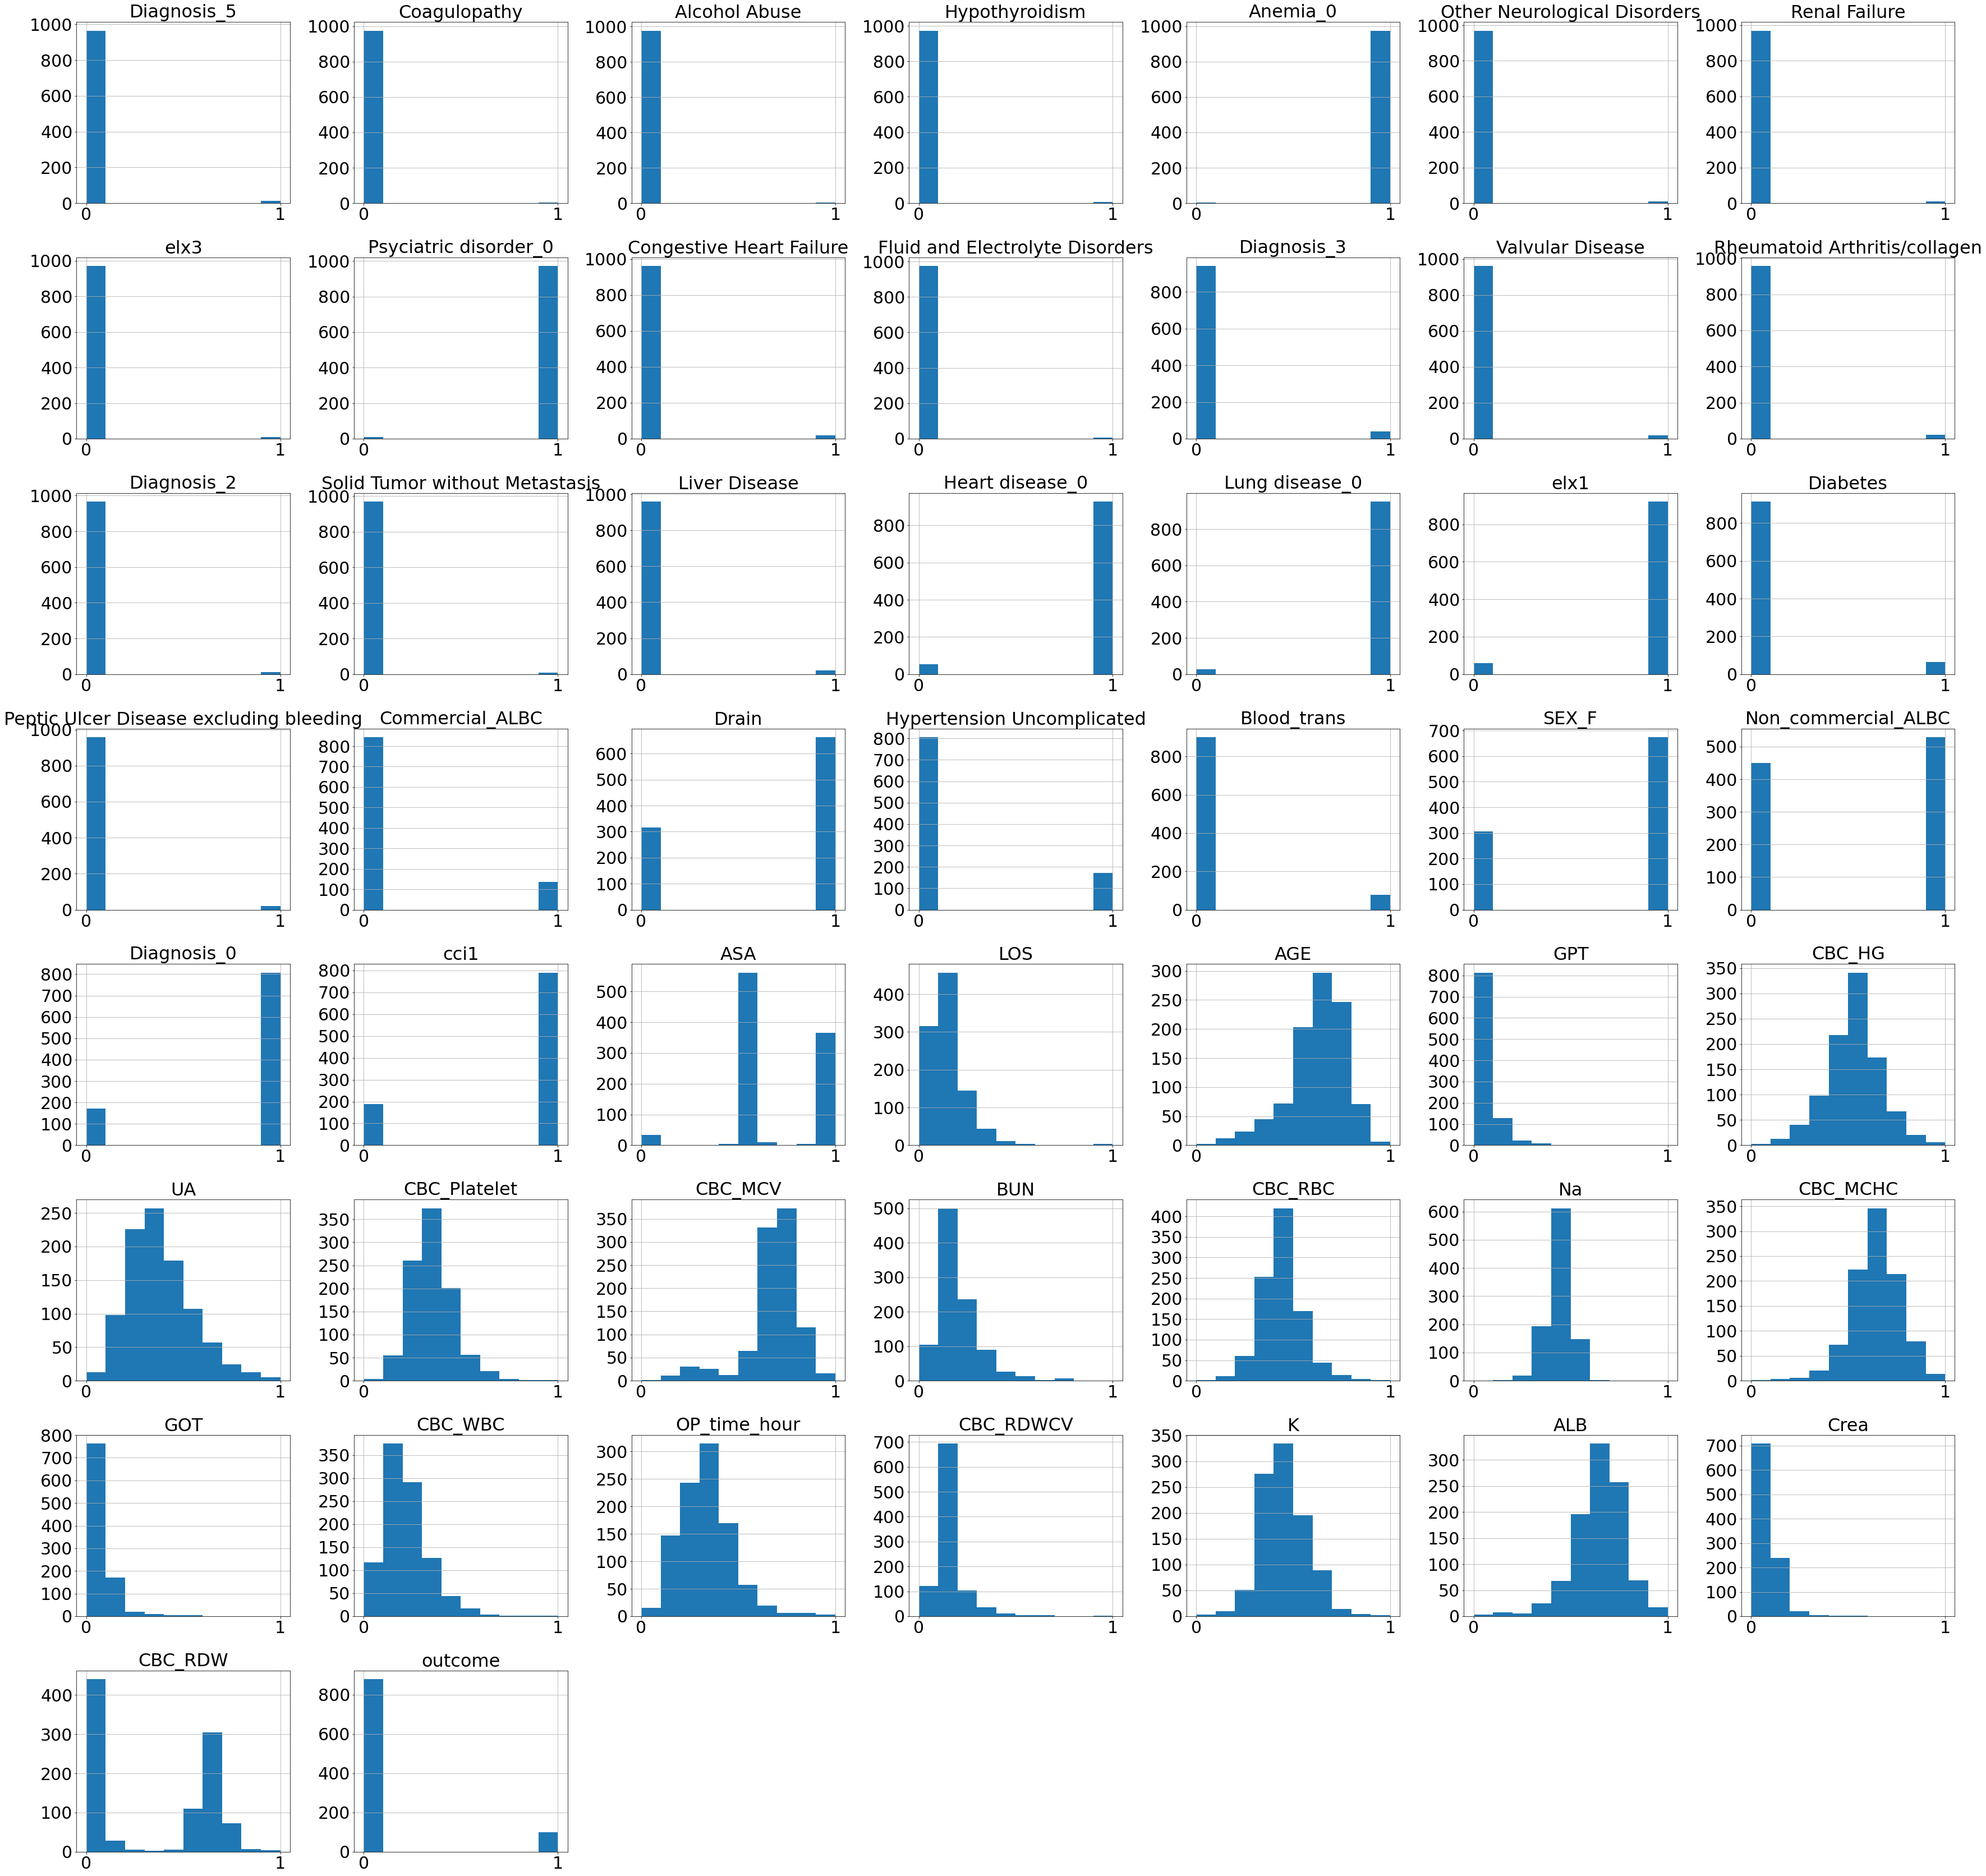

In [44]:
draw_hist(te)

## save final set

In [57]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('./temp/test_final.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
te.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('./temp/train_final.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
tr.to_excel(writer, sheet_name='Sheet1', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

#### save to .data file for training data

In [47]:
y = tr.outcome
tr.drop(columns='outcome', inplace=True)
tr.insert(tr.shape[1], 'outcome', y.to_numpy())

In [49]:
tr.to_csv("./temp/data_final.data", index=False, header=False, line_terminator='\n')#save to .data file

#### save to .test file testing data

In [51]:
te.to_csv("./temp/data_final.test", index=False, header=False, line_terminator='\n')#save to .test file

#### write .names file for training data and testing data

In [55]:
onehot_column = tr.columns[:30]
cont_column = tr.columns[30:50]
# draw_hist(tr[onehot_column])
print(onehot_column)

Index(['Diagnosis_5', 'Coagulopathy', 'Alcohol Abuse', 'Hypothyroidism',
       'Anemia_0', 'Other Neurological Disorders', 'Renal Failure', 'elx3',
       'Psyciatric disorder_0', 'Congestive Heart Failure',
       'Fluid and Electrolyte Disorders', 'Diagnosis_3', 'Valvular Disease',
       'Rheumatoid Arthritis/collagen', 'Diagnosis_2',
       'Solid Tumor without Metastasis', 'Liver Disease', 'Heart disease_0',
       'Lung disease_0', 'elx1', 'Diabetes',
       'Peptic Ulcer Disease excluding bleeding', 'Commercial_ALBC', 'Drain',
       'Hypertension Uncomplicated', 'Blood_trans', 'SEX_F',
       'Non_commercial_ALBC', 'Diagnosis_0', 'cci1'],
      dtype='object')


In [56]:
with open("./temp/data_final.names", "w", newline = '\n') as fp:
    fp.writelines("0, 1.")
    fp.writelines("\n\n")
    for col_name in onehot_column:
        fp.writelines(f"{col_name}: 0, 1. \n")
    for col_name in cont_column:
        fp.writelines(f"{col_name}: continuous. \n")


In [ ]:
with open("./temp/test_final.test", "rb") as f:
    print(f.read())

In [ ]:
with open('./temp/train_final.names', 'rb') as f:
    print(f.read())